In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.datasets as datasets
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
torch.cuda.empty_cache()
print(torch.cuda.is_available())

True


In [3]:
path = untar_data(URLs.IMAGENETTE); path

WindowsPath('C:/Users/justi/.fastai/data/imagenette')

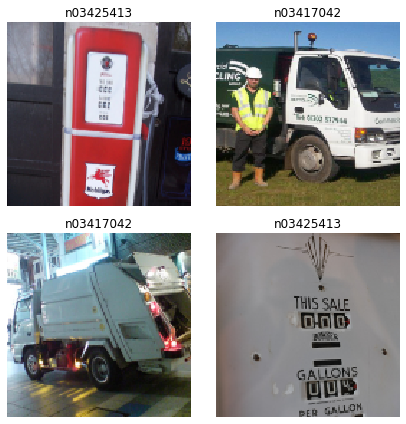

In [4]:
tfms = get_transforms()
data = ImageDataBunch.from_folder(path, valid='val', ds_tfms=tfms, bs=4, size=128).normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(6,6))

In [5]:
n=32
g=(1+5**.5)/2
m = -1.9
t = .1
a = 1.6
amin = (a-1) * t / -m
amax = amin + g**4
class mixedNet(nn.Module):
    def __init__(self):
        super(mixedNet, self).__init__()
        self.conv00 = nn.Conv2d(3, 1*n, 3, stride=1, bias=False)
        self.conv011 = nn.Conv2d(1*n, 1*n, 4, stride=1, bias=False)
        self.conv012 = nn.Conv2d(1*n, 1*n, 4, stride=1, bias=False)
        self.conv013 = nn.Conv2d(1*n, 1*n, 4, stride=1, bias=False)
        self.conv014 = nn.Conv2d(1*n, 1*n, 4, stride=1, bias=False)
        self.conv015 = nn.Conv2d(1*n, 1*n, 4, stride=1, bias=False)
        self.conv016 = nn.Conv2d(1*n, 1*n, 4, stride=1, bias=False)
        self.conv02 = nn.Conv2d(1*n, 2*n, 4, stride=2, bias=False)
        self.conv111 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv112 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv113 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv114 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv115 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv116 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv12 = nn.Conv2d(2*n, 4*n, 4, stride=2, bias=False)
        self.conv211 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv212 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv213 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv214 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv215 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv216 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv22 = nn.Conv2d(4*n, 7*n, 4, stride=2, bias=False)
        self.conv311 = nn.Conv2d(7*n, 7*n, 5, stride=1, bias=False)
        self.conv312 = nn.Conv2d(7*n, 7*n, 5, stride=1, bias=False)
        self.conv313 = nn.Conv2d(7*n, 7*n, 5, stride=1, bias=False)
        self.conv314 = nn.Conv2d(7*n, 7*n, 5, stride=1, bias=False)
        self.conv315 = nn.Conv2d(7*n, 7*n, 5, stride=1, bias=False)
        self.conv316 = nn.Conv2d(7*n, 7*n, 5, stride=1, bias=False)
        self.conv32 = nn.Conv2d(7*n, 12*n, 5, stride=2, bias=False)
        self.conv411 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv412 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv413 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv414 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv415 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv416 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv42 = nn.Conv2d(12*n, 20*n, 4, stride=2, bias=False)
        self.conv02f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv111f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv112f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv113f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv114f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv115f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv116f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv12f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv211f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv212f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv213f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv214f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv215f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv216f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv22f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv311f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv312f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv313f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv314f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv315f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv316f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv32f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv411f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv412f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv413f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv414f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv415f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv416f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv42f = nn.Conv2d(20*n, 33*n, 1, stride=1, bias=False)
        self.fc1 = nn.Linear(76*n, 10)
        self.rpad1 = nn.ReflectionPad2d(1)
        self.rpad2 = nn.ReflectionPad2d(2)
        self.drop1 = nn.Dropout(.5)
        self.relu = nn.ReLU()
        self.ap2 = nn.AvgPool2d(2)
        self.ap8 = nn.AvgPool2d(8)
        self.mp3 = nn.MaxPool2d(3)
        self.aap1 = nn.AdaptiveAvgPool2d(1)

    def forward(self, b):
        
        ans = 0
        b = b * m + t
        
        b = res = self.conv00(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b = torch.clamp(self.conv011(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv012(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv013(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv014(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv015(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv016(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
            
        b = res = self.conv02(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv02f(b))
        b2 = self.aap1(b2) * m + t
        ans = b2
        
        
        b = torch.clamp(self.conv111(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv112(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv113(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv114(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv115(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv116(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = res = self.conv12(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv12f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv211(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv212(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv213(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv214(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv215(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv216(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = res = self.conv22(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv22f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv311(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv312(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv313(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv314(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv315(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv316(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = res = self.conv32(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv32f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv411(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv412(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv413(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv414(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv415(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv416(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        res = 0
        b = torch.clamp(self.conv42(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv42f(b))
        b = 0
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        b2 = 0
        ans = ans.view(-1, 76*n)
        
        ans = self.fc1(self.drop1(ans))
        
        
        return ans
    
net = mixedNet()
print(net)

mixedNet(
  (conv00): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv011): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv012): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv013): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv014): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv015): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv016): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv02): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), bias=False)
  (conv111): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv112): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv113): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv114): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv115): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv116): Conv2

In [5]:
n=32
g=(1+5**.5)/2
m = -1.9
t = .1
a = 1.6
amin = (a-1) * t / -m
amax = amin + g**4
class mixedNet(nn.Module):
    def __init__(self):
        super(mixedNet, self).__init__()
        self.conv00 = nn.Conv2d(3, 1*n, 3, stride=1, bias=False)
        self.conv011 = nn.Conv2d(1*n, 1*n, 3, stride=1, bias=False)
        self.conv012 = nn.Conv2d(1*n, 1*n, 3, stride=1, bias=False)
        self.conv013 = nn.Conv2d(1*n, 1*n, 3, stride=1, bias=False)
        self.conv014 = nn.Conv2d(1*n, 1*n, 3, stride=1, bias=False)
        self.conv015 = nn.Conv2d(1*n, 1*n, 3, stride=1, bias=False)
        self.conv016 = nn.Conv2d(1*n, 1*n, 3, stride=1, bias=False)
        self.conv02 = nn.Conv2d(1*n, 2*n, 4, stride=2, bias=False)
        self.conv111 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv112 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv113 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv114 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv115 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv116 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv12 = nn.Conv2d(2*n, 4*n, 4, stride=2, bias=False)
        self.conv211 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv212 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv213 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv214 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv215 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv216 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv22 = nn.Conv2d(4*n, 7*n, 4, stride=2, bias=False)
        self.conv311 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv312 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv313 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv314 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv315 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv316 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv32 = nn.Conv2d(7*n, 12*n, 4, stride=2, bias=False)
        self.conv411 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv412 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv413 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv414 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv415 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv416 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv42 = nn.Conv2d(12*n, 20*n, 4, stride=2, bias=False)
        self.conv016f = nn.Conv2d(1*n, 2*n, 1, stride=1, bias=False)
        self.conv02f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv111f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv112f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv113f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv114f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv115f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv116f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv12f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv211f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv212f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv213f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv214f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv215f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv216f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv22f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv311f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv312f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv313f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv314f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv315f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv316f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv32f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv411f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv412f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv413f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv414f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv415f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv416f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv42f = nn.Conv2d(20*n, 33*n, 1, stride=1, bias=False)
        self.fc1 = nn.Linear(121*n, 10, bias=False)
        self.rpad1 = nn.ReflectionPad2d(1)
        self.rpad2 = nn.ReflectionPad2d(2)
        self.drop1 = nn.Dropout(.5)
        self.relu = nn.ReLU()
        self.ap2 = nn.AvgPool2d(2)
        self.ap8 = nn.AvgPool2d(8)
        self.mp3 = nn.MaxPool2d(3)
        self.aap1 = nn.AdaptiveAvgPool2d(1)

    def forward(self, b):
        
        ans = 0
        b = b * m + t
        
        b = res = self.conv00(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b = torch.clamp(self.conv011(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv012(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv013(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv014(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv015(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv016(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv016f(b))
        b2 = self.aap1(b2) * m + t
        ans = b2
            
        b = res = self.conv02(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv02f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        
        b = torch.clamp(self.conv111(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv112(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv113(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv114(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv115(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv116(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv116f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv12(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv12f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv211(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv212(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv213(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv214(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv215(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv216(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv216f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv22(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv22f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv311(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv312(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv313(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv314(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv315(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv316(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv316f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv32(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv32f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv411(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv412(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv413(self.rpad2(b)), min = amin, max = amax) * m + (a * t)        
        b = res = self.conv414(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv415(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv416(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv416f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        res = 0
        b = torch.clamp(self.conv42(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv42f(b))
        b = 0
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        b2 = 0
        ans = ans.view(-1, 121*n)
        
        ans = self.fc1(self.drop1(ans))
        
        
        return ans
    
net = mixedNet()
print(net)

mixedNet(
  (conv00): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv011): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv012): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv013): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv014): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv015): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv016): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv02): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), bias=False)
  (conv111): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv112): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv113): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv114): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv115): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv116): Conv2

In [13]:
n=32
g=(1+5**.5)/2
m = -1.9
t = .1
a = 1.6
amin = (a-1) * t / -m
amax = amin + g**4
class mixedNet(nn.Module):
    def __init__(self):
        super(mixedNet, self).__init__()
        self.conv00 = nn.Conv2d(3, 1*n, 3, stride=1, bias=False)
        self.conv011 = nn.Conv2d(1*n, 1*n, 4, stride=1, bias=False)
        self.conv012 = nn.Conv2d(1*n, 1*n, 4, stride=1, bias=False)
        self.conv013 = nn.Conv2d(1*n, 1*n, 4, stride=1, bias=False)
        self.conv014 = nn.Conv2d(1*n, 1*n, 4, stride=1, bias=False)
        self.conv015 = nn.Conv2d(1*n, 1*n, 4, stride=1, bias=False)
        self.conv016 = nn.Conv2d(1*n, 1*n, 4, stride=1, bias=False)
        self.conv02 = nn.Conv2d(1*n, 2*n, 4, stride=2, bias=False)
        self.conv111 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv112 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv113 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv114 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv115 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv116 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv12 = nn.Conv2d(2*n, 4*n, 4, stride=2, bias=False)
        self.conv211 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv212 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv213 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv214 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv215 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv216 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv22 = nn.Conv2d(4*n, 7*n, 4, stride=2, bias=False)
        self.conv311 = nn.Conv2d(7*n, 7*n, 5, stride=1, bias=False)
        self.conv312 = nn.Conv2d(7*n, 7*n, 5, stride=1, bias=False)
        self.conv313 = nn.Conv2d(7*n, 7*n, 5, stride=1, bias=False)
        self.conv314 = nn.Conv2d(7*n, 7*n, 5, stride=1, bias=False)
        self.conv315 = nn.Conv2d(7*n, 7*n, 5, stride=1, bias=False)
        self.conv316 = nn.Conv2d(7*n, 7*n, 5, stride=1, bias=False)
        self.conv32 = nn.Conv2d(7*n, 12*n, 4, stride=2, bias=False)
        self.conv411 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv412 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv413 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv414 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv415 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv416 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv42 = nn.Conv2d(12*n, 20*n, 4, stride=2, bias=False)
        self.conv013f = nn.Conv2d(1*n, 2*n, 1, stride=1, bias=False)
        self.conv016f = nn.Conv2d(1*n, 2*n, 1, stride=1, bias=False)
        self.conv02f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv111f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv112f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv113f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv114f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv115f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv116f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv12f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv211f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv212f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv213f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv214f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv215f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv216f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv22f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv311f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv312f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv313f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv314f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv315f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv316f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv32f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv411f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv412f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv413f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv414f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv415f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv416f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv42f = nn.Conv2d(20*n, 33*n, 1, stride=1, bias=False)
        self.fc1 = nn.Linear(166*n, 10)
        self.rpad1 = nn.ReflectionPad2d(1)
        self.rpad2 = nn.ReflectionPad2d(2)
        self.drop1 = nn.Dropout(.5)
        self.relu = nn.ReLU()
        self.ap2 = nn.AvgPool2d(2)
        self.ap8 = nn.AvgPool2d(8)
        self.mp3 = nn.MaxPool2d(3)
        self.aap1 = nn.AdaptiveAvgPool2d(1)

    def forward(self, b):
        
        ans = 0
        b = b * m + t
        
        b = res = self.conv00(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b = torch.clamp(self.conv011(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv012(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv013(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv013f(b))
        b2 = self.aap1(b2) * m + t
        ans = b2
        
        b = res = self.conv014(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv015(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv016(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv016f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
            
        b = res = self.conv02(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv02f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        
        b = torch.clamp(self.conv111(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv112(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv113(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv113f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv114(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv115(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv116(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv116f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv12(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv12f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv211(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv212(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv213(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv213f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv214(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv215(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv216(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv216f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv22(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv22f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv311(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv312(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv313(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv313f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv314(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv315(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv316(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv316f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv32(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv32f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv411(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv412(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv413(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv413f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv414(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv415(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv416(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv416f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        res = 0
        b = torch.clamp(self.conv42(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv42f(b))
        b = 0
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        b2 = 0
        ans = ans.view(-1, 166*n)
        
        ans = self.fc1(self.drop1(ans))
        
        
        return ans
    
net = mixedNet()
print(net)

mixedNet(
  (conv00): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv011): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv012): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv013): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv014): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv015): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv016): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv02): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), bias=False)
  (conv111): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv112): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv113): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv114): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv115): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv116): Conv2

In [6]:
learn = Learner(data, net, metrics=accuracy)
learn.loss = F.cross_entropy

In [10]:
learn = Learner(data, net, metrics=accuracy)
learn.loss = F.cross_entropy

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


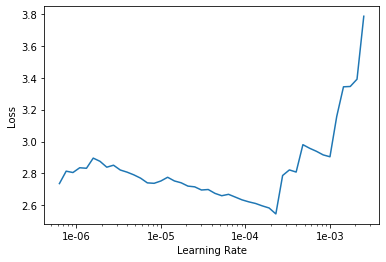

In [7]:
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


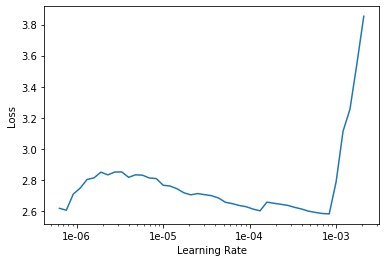

In [11]:
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


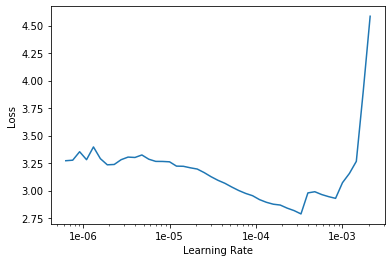

In [15]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(40, 1e-4, wd=0)

epoch,train_loss,valid_loss,accuracy,time
0,1.639319,1.456914,0.514000,16:07
1,1.394369,1.199349,0.612000,15:55
2,1.253576,1.024046,0.640000,15:55
3,1.150959,1.014488,0.674000,16:07
4,0.999531,0.835119,0.726000,15:47
5,1.041793,0.727915,0.756000,15:57
6,0.846807,0.652442,0.774000,16:05
7,0.943221,0.813437,0.766000,15:40
8,1.039190,0.703666,0.794000,15:57
9,0.828859,0.632481,0.800000,16:06


In [ ]:
learn.fit_one_cycle(40, 1e-4, wd=0)

epoch,train_loss,valid_loss,accuracy,time
0,1.642717,1.473902,0.506000,14:27
1,1.389920,1.203484,0.604000,14:30
2,1.256469,0.995156,0.684000,14:07
3,1.114227,1.108279,0.640000,14:34
4,1.150004,0.780081,0.756000,14:37


In [12]:
learn.fit_one_cycle(40, 1e-4, wd=0)

epoch,train_loss,valid_loss,accuracy,time
0,1.647111,1.451540,0.514000,15:28
1,1.451798,1.232484,0.594000,15:31
2,1.334390,1.110541,0.624000,15:26
3,1.179050,1.027421,0.654000,14:38
4,1.017566,0.866075,0.720000,15:23
5,0.908984,0.713403,0.758000,15:22
6,0.992355,0.749588,0.752000,15:05
7,0.995804,0.704954,0.754000,15:12
8,0.880288,0.759654,0.798000,15:21
9,0.795326,0.600418,0.824000,15:21


In [8]:
learn.fit_one_cycle(40, 1e-4, wd=0)

epoch,train_loss,valid_loss,accuracy,time
0,1.643050,1.397140,0.514000,14:56
1,1.320559,1.215095,0.596000,14:17
2,1.421348,1.071453,0.680000,14:44
3,1.057975,0.899505,0.716000,14:58
4,1.083642,0.906197,0.704000,14:46
5,0.968463,0.842970,0.754000,14:33
6,0.971601,0.761537,0.762000,14:28
7,0.782458,0.703648,0.802000,14:41
8,0.797279,0.634393,0.804000,14:39
9,0.901806,0.612092,0.792000,14:32


In [9]:
learn.save('stage-1')

In [10]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

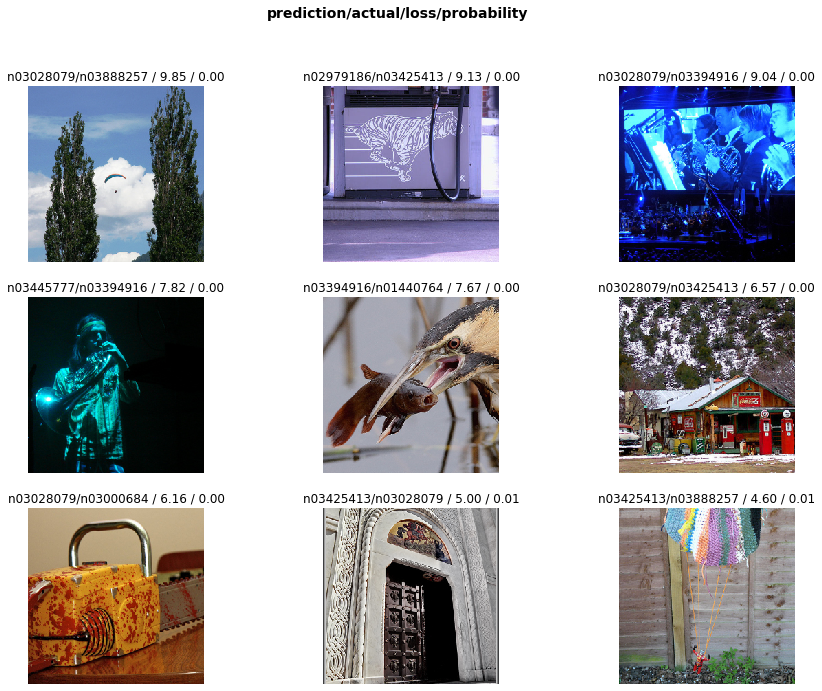

In [11]:
interp.plot_top_losses(9, figsize=(15,11))

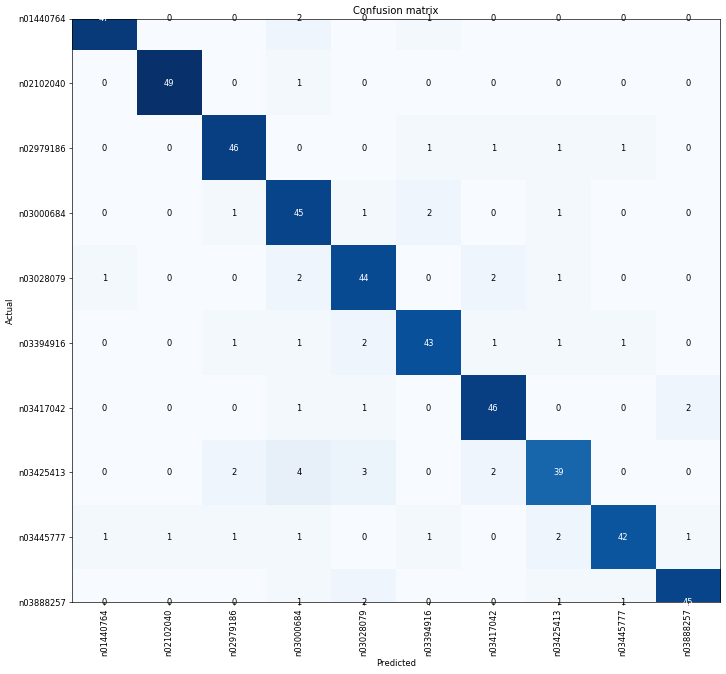

In [12]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [24]:
open_image(data.items[25]).data

tensor([[[0.9098, 1.0000, 0.9255,  ..., 0.1569, 0.0784, 0.0039],
         [0.7176, 0.7137, 1.0000,  ..., 0.2588, 0.2275, 0.1529],
         [0.4235, 0.6706, 0.9098,  ..., 0.1922, 0.1451, 0.1529],
         ...,
         [0.6902, 0.7725, 0.6314,  ..., 0.0549, 0.0745, 0.1020],
         [0.5686, 0.3961, 0.8196,  ..., 0.0706, 0.0980, 0.1333],
         [0.8039, 0.5059, 0.5412,  ..., 0.0941, 0.1137, 0.1725]],

        [[0.9137, 1.0000, 0.9333,  ..., 0.2000, 0.1176, 0.0431],
         [0.7333, 0.7294, 1.0000,  ..., 0.3020, 0.2706, 0.1922],
         [0.4549, 0.7020, 0.9451,  ..., 0.2353, 0.1882, 0.1922],
         ...,
         [0.8196, 0.8980, 0.7294,  ..., 0.0745, 0.0941, 0.1216],
         [0.6980, 0.5098, 0.9176,  ..., 0.0706, 0.0980, 0.1333],
         [0.9176, 0.6039, 0.6196,  ..., 0.0902, 0.1098, 0.1686]],

        [[0.7490, 0.8471, 0.7373,  ..., 0.0824, 0.0118, 0.0000],
         [0.6039, 0.5843, 0.8627,  ..., 0.1765, 0.1529, 0.0941],
         [0.3725, 0.6078, 0.8235,  ..., 0.1098, 0.0706, 0.

In [5]:
data[0]

TypeError: 'ImageDataBunch' object is not subscriptable

In [7]:
open_image(data.items[10]).data

tensor([[[0.1333, 0.1569, 0.1137,  ..., 0.5020, 0.4784, 0.4510],
         [0.1216, 0.1647, 0.1333,  ..., 0.4314, 0.4118, 0.3922],
         [0.0902, 0.1490, 0.1294,  ..., 0.3137, 0.3098, 0.3020],
         ...,
         [0.1882, 0.2863, 0.2549,  ..., 0.2549, 0.2588, 0.2588],
         [0.1843, 0.2510, 0.2549,  ..., 0.2471, 0.2627, 0.2784],
         [0.1686, 0.2392, 0.2431,  ..., 0.2510, 0.2667, 0.2824]],

        [[0.1569, 0.2000, 0.1804,  ..., 0.5490, 0.5255, 0.4980],
         [0.1686, 0.2275, 0.2157,  ..., 0.4902, 0.4706, 0.4510],
         [0.1686, 0.2471, 0.2431,  ..., 0.3882, 0.3843, 0.3765],
         ...,
         [0.1882, 0.2863, 0.2549,  ..., 0.3020, 0.3059, 0.3059],
         [0.1922, 0.2588, 0.2627,  ..., 0.2902, 0.3059, 0.3216],
         [0.1765, 0.2471, 0.2510,  ..., 0.2941, 0.3098, 0.3255]],

        [[0.1490, 0.1843, 0.1569,  ..., 0.6510, 0.6275, 0.6000],
         [0.1608, 0.2157, 0.1961,  ..., 0.6039, 0.5843, 0.5647],
         [0.1647, 0.2353, 0.2275,  ..., 0.5059, 0.5020, 0.